In [82]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/release/bin/'
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [83]:
from sklearn.model_selection import cross_val_score
from IPython.display import HTML
from graphviz import Source
from IPython.display import display
from IPython.display import SVG
style="<style>svg(width:70% !important;height:70% !important;)</style>"
HTML(style)

In [84]:
titanic_data = pd.read_csv('train.csv')
titanic_data.isnull().sum() #показывает сколько пропущенных значений в каждой кабинке

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [85]:
X = titanic_data.drop(['PassengerId','Survived','Name','Ticket', 'Cabin'], axis=1)
y= titanic_data.Survived


X =pd.get_dummies(X)#меняет стринговые занчения на цифровые (0,1,2..)

In [86]:

X = X.fillna(X.Age.median())
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [87]:
clf =tree.DecisionTreeClassifier(criterion='entropy')
clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [88]:
# graph = Source(tree.export_graphviz(clf, out_file=None
#                                     ,feature_names=list(X), class_names=['Died', 'Survived']
                                    # , filled= True))
# display(SVG(graph.pipe(format='svg')))


In [89]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)


In [91]:
clf =tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

0.8406040268456376

In [92]:
score_data = pd.DataFrame()
clf.score(X_test, y_test)

0.8067796610169492

In [93]:
max_depth_range = range(1,50)
for max_depth in max_depth_range:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train,y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test,y_test)
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 'train_score':[train_score], 
                                    'test_score':[test_score], 'cross_val_score': [mean_cross_val_score]})
    
    score_data =score_data.append(temp_score_data)

In [94]:
score_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781857
0,2,0.805369,0.776271,0.768553
0,3,0.823826,0.820339,0.788678
0,4,0.833893,0.823729,0.783580
0,5,0.840604,0.810169,0.805345


In [95]:
score_data_long = pd.melt(score_data, id_vars=['max_depth'], 
                          value_vars=['train_score', 'test_score','cross_val_score'],
                          var_name='set_type', value_name='score')


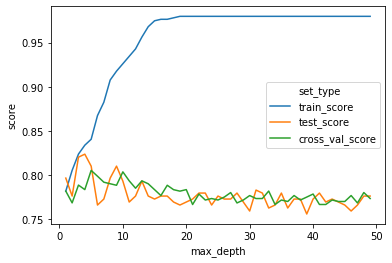

In [96]:
sns.lineplot(x="max_depth", y="score", hue='set_type',data=score_data_long)

In [97]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [98]:
cross_val_score(clf, X_train, y_train, cv=5)


array([0.76666667, 0.80833333, 0.78991597, 0.74789916, 0.80508475])